In [1]:
from IPython.display import display, HTML
import scipy.constants as sc
from scipy.optimize import fsolve
from ipywidgets import interact, widgets
%matplotlib notebook

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
import h5py

print(os.getpid())
%cd ../../

16994
/media/work/docs/codes/QuCF/scripts-py


In [2]:
# --- Launch to change cells' width ---
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pylib.mix as mix
import pylib.qucf_read as qucf_r
import pylib.qucf_oracle as qucf_o
import pylib.qucf_matrix_D as qucf_m
import kin1d1d as kin
path_ = "../simulations/KIN1D1D/"
path_D_ = "../simulations/KIN1D1D/matrices-D/"
path_cl_ = "../results/KIN1D1D-results/"
path_save_ = "../results/KIN1D1D-results/figs/"

In [14]:
# ---------------------------------------------------------------
# --- Read data ---
# ---------------------------------------------------------------
mix.reload_module(qucf_r)

print()
dd_q = qucf_r.read_matrix_sparse(path_D_, "flat_33_OUTPUT.hdf5") #  nv = 4, nx = 4 
dd_c_ = kin.read_matrix_sparse(path_cl_, "w12/out_3_3_w1.2_Lx100_Lv4_flat.hdf5")

nx_work, nv_work = 3, 3


Nx_work = 1 << nx_work
Nv_work = 1 << nv_work
Nvar_work = Nx_work * Nv_work
D_F = dd_q["A"].get_slice(0, 0, Nvar_work)
A_norm = kin.normalize_matrix_A(dd_c_["A"], D_F, nv_work)
A_F    = A_norm.get_slice(0, 0, Nvar_work)
B_fixed, B_values = kin.extract_fixed_profile_matrix_from_F(nx_work, nv_work, A_F, D_F)


Reading the matrix from: flat_33_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/matrices-D/
date of the simulation:  06-06-2023 09:51:13
matrix name:  U_BE
N = 128
Reading data from w12/out_3_3_w1.2_Lx100_Lv4_flat.hdf5...
date of the simulation:  06-22-2023 15:48:52
N, nx, nv = 128, 3, 3
Done.

original matrix >>>
amax. value: 			4.000e+00
amin.(excl. zero) value: 	6.118e-04


normalized matrix >>>
amax. value: 			1.405e-03
amin.(excl. zero) value: 	2.150e-07



<IPython.core.display.Javascript object>


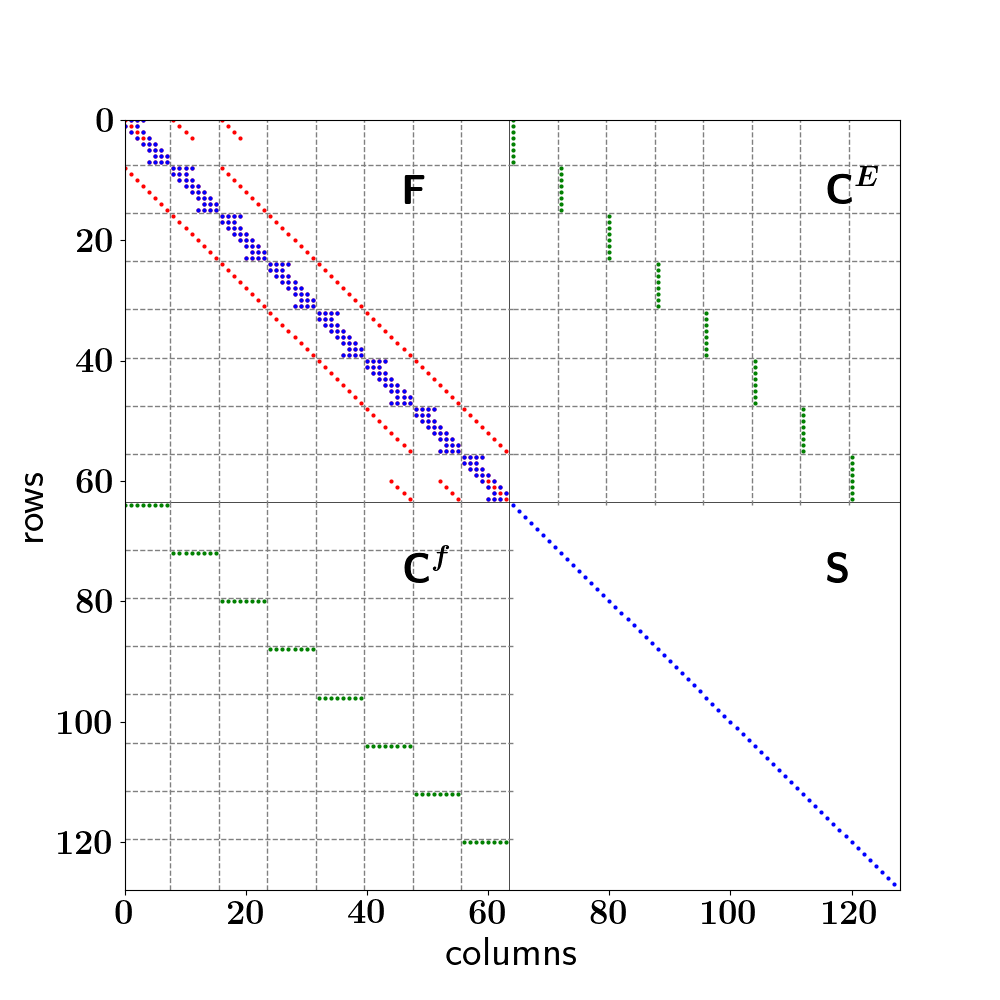

In [19]:
# --------------------------------------------------------------
# --- PLOT the matrix structure in different colors ---
# --------------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(kin)

A_CE  = A_norm.get_slice(0,         Nvar_work, Nvar_work)
A_Cf  = A_norm.get_slice(Nvar_work,         0, Nvar_work)
A_S   = A_norm.get_slice(Nvar_work, Nvar_work, Nvar_work)

fig_B_colored_structure = kin.plot_colored_A_structure(
    Nx_work, Nv_work, 
    B_fixed, D_F, A_CE, A_Cf, A_S,
    flag_save = False, 
    path_save = path_save_, 
    fontsize = 30, 
    cmap='bwr'
)

del A_CE, A_Cf, A_S